In [6]:
import numpy as np, pandas as pd 

In [7]:
#!pip install fasttext

In [8]:
import fasttext

In [10]:
help(fasttext.FastText)

Help on module fasttext.FastText in fasttext:

NAME
    fasttext.FastText

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the MIT license found in the
    # LICENSE file in the root directory of this source tree.

FUNCTIONS
    cbow(*kargs, **kwargs)
    
    eprint(*args, **kwargs)
    
    load_model(path)
        Load a model given a filepath and return a model object.
    
    read_args(arg_list, arg_dict, arg_names, default_values)
    
    skipgram(*kargs, **kwargs)
    
    supervised(*kargs, **kwargs)
    
    tokenize(text)
        Given a string of text, tokenize it and return a list of tokens
    
    train_supervised(*kargs, **kwargs)
        Train a supervised model and return a model object.
        
        input must be a filepath. The input text does not need to be tokenized
        as per the tokenize function, but it must be preprocessed and encoded
        as UTF-8. You might wan

In [22]:
train_data = pd.read_csv("train_data.txt", sep=" :::", header=None, engine="python")
train_data.columns = ['Id', 'Title', 'Genre', 'Desc.']
train_data.drop(['Id', 'Desc.'], axis=1, inplace=True)

In [29]:
train_data.head()

,Title,Genre
0,Oscar et la dame rose (2009),drama
1,Cupid (1997),thriller
2,"Young, Wild and Wonderful (1980)",adult
3,The Secret Sin (1915),drama
4,The Unrecovered (2007),drama


In [24]:
test_data = pd.read_csv("test_data.txt", sep=" :::", header=None)
test_data.columns = ['Id', 'Title', 'Desc.']
test_data.drop(['Id', 'Desc.'], axis=1, inplace=True)

/Users/basitnadeem/opt/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [27]:
test_data


,Title
0,Edgar's Lunch (1998)
1,La guerra de papá (1977)
2,Off the Beaten Track (2010)
3,Meu Amigo Hindu (2015)
4,Er nu zhai (1955)
...,...
54195,"""Tales of Light & Dark"" (2013)"
54196,Der letzte Mohikaner (1965)
54197,Oliver Twink (2007)
54198,Slipstream (1973)


In [34]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Title    0
Genre    0
dtype: int64
Title    0
dtype: int64


<AxesSubplot:xlabel='count', ylabel='Genre'>

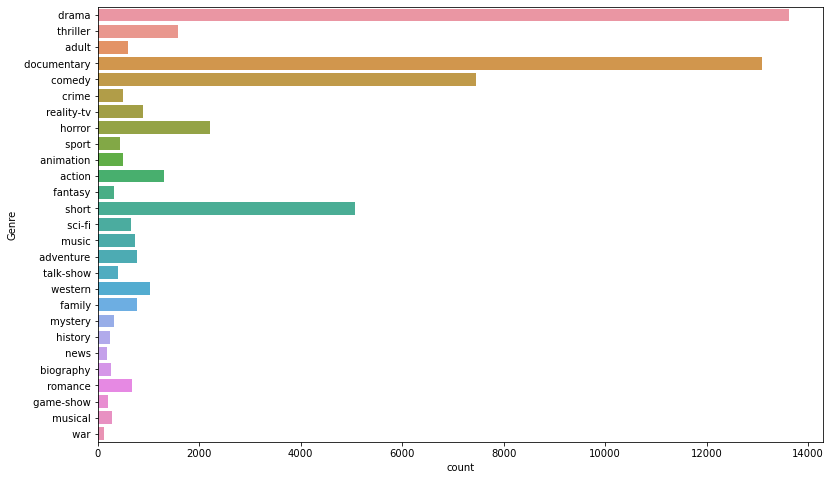

In [72]:
import seaborn as sns 
plt.figure(figsize=(13,8))
sns.countplot(y='Genre', data=train_data, )

In [70]:
c = train_data.Genre.value_counts()
c

 drama          13613
 documentary    13096
 comedy          7447
 short           5073
 horror          2204
 thriller        1591
 action          1315
 western         1032
 reality-tv       884
 family           784
 adventure        775
 music            731
 romance          672
 sci-fi           647
 adult            590
 crime            505
 animation        498
 sport            432
 talk-show        391
 fantasy          323
 mystery          319
 musical          277
 biography        265
 history          243
 game-show        194
 news             181
 war              132
Name: Genre, dtype: int64

In [81]:
train_data[['Title', 'Genre']].to_csv('train.txt', 
                                          index = False, 
                                          sep = ' ',
                                          header = None, 
                                          #quoting = csv.QUOTE_NONE, 
                                          #quotechar = "", 
                                          escapechar = " ")


In [85]:
test_data[['Title']].to_csv('test.txt', 
                                     index = False, 
                                     sep = ' ',
                                     header = None, 
                                     #quoting = csv.QUOTE_NONE, 
                                     #quotechar = "", 
                                     escapechar = " ")

In [86]:
model = fasttext.train_supervised('train.txt', wordNgrams = 2)

Read 0M words
Number of words:  56284
Number of labels: 0
Progress: 100.0% words/sec/thread: 1853202 lr:  0.000000 avg.loss:       nan ETA:   0h 0m 0s
